['', 'dummy', '', '', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', '', '', '', '', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', '', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', '', 'dummy', '', '', '', 'dummy', 'dummy', 'dummy', 'dummy', '', '', '', '', '', '', '', '', '', '', 'dummy', '', 'dummy', '', 'dummy', '', 'dummy', '', '', 'dummy', 'dummy', 'dummy', '', '', '', '', '', '', '', '', '', 'dummy', 'dummy']
0.9342381231479655
-1.1686015869593065e+19
[10.05, 16.82777777777778, 23.605555555555554, 30.383333333333333, 37.16111111111111, 43.93888888888888, 50.71666666666667, 57.49444444444444, 64.27222222222223, 71.05] 
 [0.926411099, 0.9224066679, 0.9194145436, 0.9170660379, 0.9151401553, 0.9135052527, 0.912079598, 0.9108100917, 0.9096607818, 0.9086064324] 
 [0.8492029537, 0.864585604, 0.8711695759, 0.8744543353, 0.8762460233, 0.8772736872, 0.8778747308, 0.8782214084, 0.8784084207, 0.8784909347]


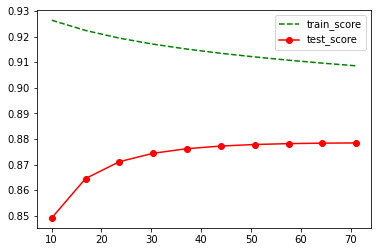

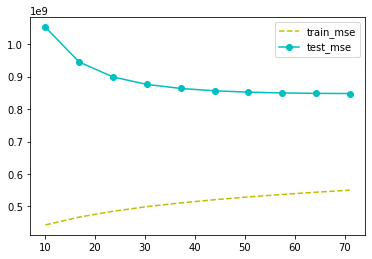

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mserr

path = "C://Users/shiri/Code Camp/house-prices-advanced-regression-techniques/"
train = path + "train.csv"
test = path + "test.csv"
trainx_df = pd.read_csv(train,index_col = 'Id')
# print(trainx_df.shape)
trainy_df= trainx_df['SalePrice']
# print(trainy_df.shape)
trainx_df.drop('SalePrice',axis=1, inplace=True)
testx_df = pd.read_csv(test,index_col = 'Id')
# print(trainx_df.isnull().sum())
sample_size = len(trainx_df)
coulums_with_null = [[col,float(trainx_df[col].isnull().sum())/
                     float(sample_size)] for col in trainx_df.columns if
                     trainx_df[col].isnull().sum()]
#print (coulums_with_null)

columns_to_drop = [x for(x,y) in coulums_with_null if y>0.3]
# print(columns_to_drop)
trainx_df.drop(columns_to_drop,axis = 1, inplace =True)
testx_df.drop(columns_to_drop, axis = 1, inplace = True)
# print(len(trainx_df.columns))
# print(len(trainx_df))
# trainx_df.dropna(axis =0,inplace= True)
# print(len(trainx_df)) 
categorical_col = [col for col in trainx_df.columns if trainx_df[col].dtype==object]
# print(len(categorical_col))
# categorical_col.append('MSSubClass')
# print(categorical_col,'\n', len(categorical_col))
ordinal_col = [col for col in trainx_df.columns if col not in categorical_col]
# print(len(ordinal_col))

dummy_row = list()
for col in trainx_df.columns:
    if col in categorical_col:
        dummy_row.append("dummy")
    else:
        dummy_row.append("")
print(dummy_row)

new_row = pd.DataFrame([dummy_row],columns = trainx_df.columns)
trainx_df = pd.concat([trainx_df,new_row],axis = 0, ignore_index = True)
for col in categorical_col:
    trainx_df[col].fillna(value = "dummy", inplace = True)
    testx_df[col].fillna(value = "dummy", inplace = True)
enc = OneHotEncoder(drop ='first',sparse = False)
enc.fit(trainx_df[categorical_col])
# print(enc.get_feature_names(categorical_col))
trainx_enc = pd.DataFrame(enc.transform(trainx_df[categorical_col]))
testx_enc = pd.DataFrame(enc.transform(trainx_df[categorical_col]))
trainx_enc.columns =enc.get_feature_names(categorical_col)
testx_enc.columns =enc.get_feature_names(categorical_col)
trainx_df = pd.concat([trainx_df[ordinal_col],trainx_enc],axis=1,ignore_index = True)
testx_df = pd.concat([testx_df[ordinal_col],testx_enc],axis=1,ignore_index = True)
# trainx_df.to_csv("encodedtrainx.csv")

trainx_df.drop(trainx_df.tail(1).index,inplace=True)

imputer = KNNImputer(n_neighbors=2)
imputer.fit(trainx_df)
trainx_df_filled = imputer.transform(trainx_df)
trainx_df_filled = pd.DataFrame(trainx_df_filled,columns = trainx_df.columns)
# print((trainx_df_filled.isnull().sum()))

testx_df_filled = imputer.transform(testx_df)
testx_df_filled = pd.DataFrame(testx_df_filled,columns = testx_df.columns)
testx_df_filled.reset_index(drop=True,inplace=True)
# print((testx_df_filled.isnull().sum()))


scaler = preprocessing.StandardScaler().fit(trainx_df_filled)
trainx_df_filled = scaler.transform(trainx_df_filled)
testx_df_filled = scaler.transform(testx_df_filled)
X_train, X_test, y_train, y_test = train_test_split(trainx_df_filled, trainy_df.values.ravel(), test_size = 0.3, random_state = 42)

reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))
score_train=[]
score_test=[]
mse_train=[]
mse_test=[]
alpha=[]
for sigma in np.linspace(10.05, 71.05, 10):
    alpha.append(sigma)
    reg = Ridge(alpha = sigma, tol = 0.0001)
    reg = reg.fit(X_train, y_train)
    pred = pd.DataFrame(reg.predict(testx_df_filled))
    score_train.append(round(reg.score(X_train, y_train),10))
    score_test.append(round(reg.score(X_test, y_test),10))
    mse_train.append(round(mserr(y_train,reg.predict(X_train)),4))
    mse_test.append(round(mserr(y_test,reg.predict(X_test)),4))
    testpred = pd.DataFrame(reg.predict(testx_df_filled))
    testpred.to_csv("test_pred.csv")
print(alpha, '\n', score_train, '\n', score_test)
plt.figure(1)
plt.plot(alpha, score_train, 'g--',label="train_score")
plt.plot(alpha, score_test, 'r-o',label="test_score")
plt.xlabel='Alpha' 
plt.legend()
plt.figure(2)
plt.plot(alpha, mse_train, 'y--',label="train_mse")
plt.plot(alpha, mse_test, 'c-o',label="test_mse")
plt.xlabel='Alpha'
plt.legend()
plt.show()